In [43]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('reviews_data.csv')  # Replace with the actual file path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


[nltk_data] Downloading package punkt to C:\Users\Andi Zaky
[nltk_data]     Ashari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andi Zaky
[nltk_data]     Ashari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Andi Zaky
[nltk_data]     Ashari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Show top 10 of reviewers location
===================================

C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


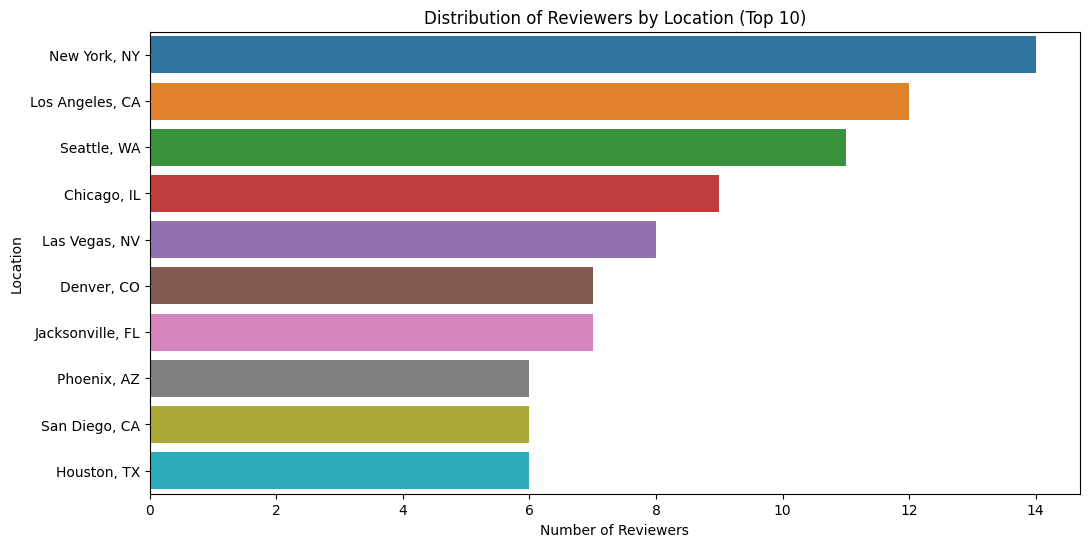

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of reviewers from each location
location_counts = df['location'].value_counts()

# Plot the top N locations (adjust N as needed)
N = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts[:N], y=location_counts.index[:N])
plt.xlabel('Number of Reviewers')
plt.ylabel('Location')
plt.title('Distribution of Reviewers by Location (Top {})'.format(N))
plt.show()


Show distribution of ratings
===========================

C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

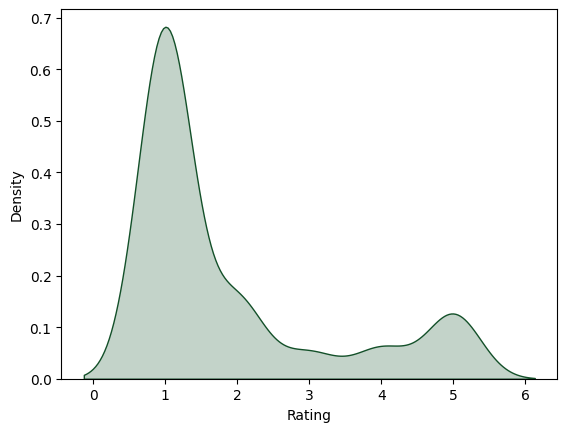

In [38]:
sns.kdeplot(x = df["Rating"], fill = True, color = '#135029')

show how many reviews overtime
=============================

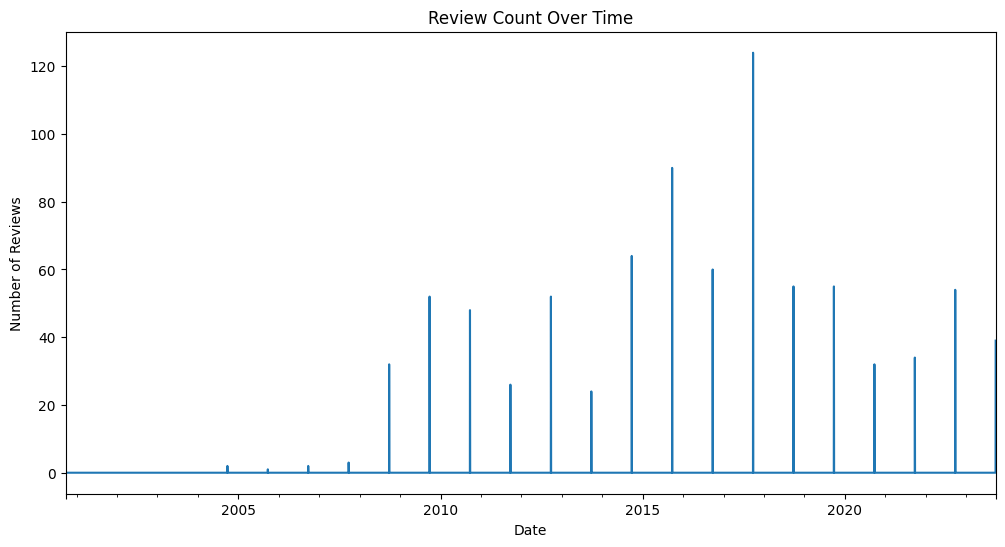

In [45]:
from dateutil.parser import parse

# Define a function to extract the date portion from the strings
def extract_date(date_string):
    try:
        # Split the string by comma and take the second part
        date_part = date_string.split(',')[1].strip()
        # Parse the date
        return parse(date_part)
    except:
        return None

# Apply the extract_date function to the 'Date' column
df['Date'] = df['Date'].apply(extract_date)

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Group reviews by date and count the number of reviews per day
daily_review_counts = df.resample('D', on='Date').size()

# Plot a line chart for review count vs. date
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_review_counts.plot()
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Review Count Over Time')
plt.show()


Show frequently used word
===========================

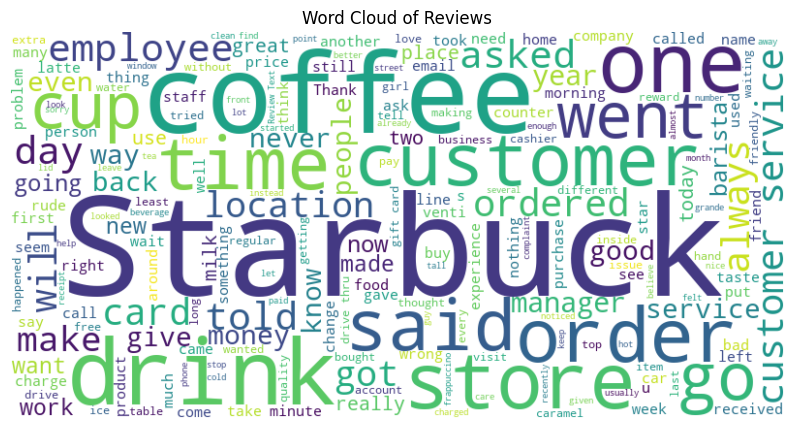

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all review text into a single string
all_reviews = ' '.join(df['Review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


Data cleaning and tokenizing
===========================

In [49]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    tokens = nltk.word_tokenize(text)  # Use nltk's word_tokenize
    stop_words = set(nltk.corpus.stopwords.words('english'))  # Use nltk's stop words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Review' column
df['Cleaned Review'] = df['Review'].apply(preprocess_text)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            850 non-null    object        
 1   location        850 non-null    object        
 2   Date            850 non-null    datetime64[ns]
 3   Rating          705 non-null    float64       
 4   Review          850 non-null    object        
 5   Image_Links     850 non-null    object        
 6   Cleaned Review  850 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 46.6+ KB


Intitialize the VADER sentiment intensity analyzer to calculate sentiment scores for each review
======================================

In [50]:
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df['Sentiment'] = df['Cleaned Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Map sentiment scores to sentiment labels
def map_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Label'] = df['Sentiment'].apply(map_sentiment)

In [51]:
sentiment_counts = df['Sentiment Label'].value_counts()
print(sentiment_counts)

Sentiment Label
Positive    434
Negative    335
Neutral      81
Name: count, dtype: int64


Show top 10 positive and negative words
=======================

C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


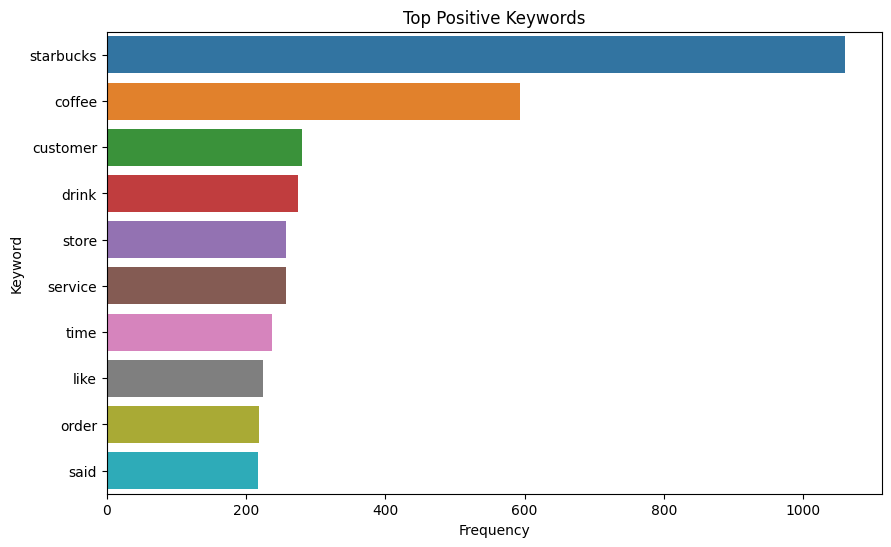

C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andi Zaky Ashari\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


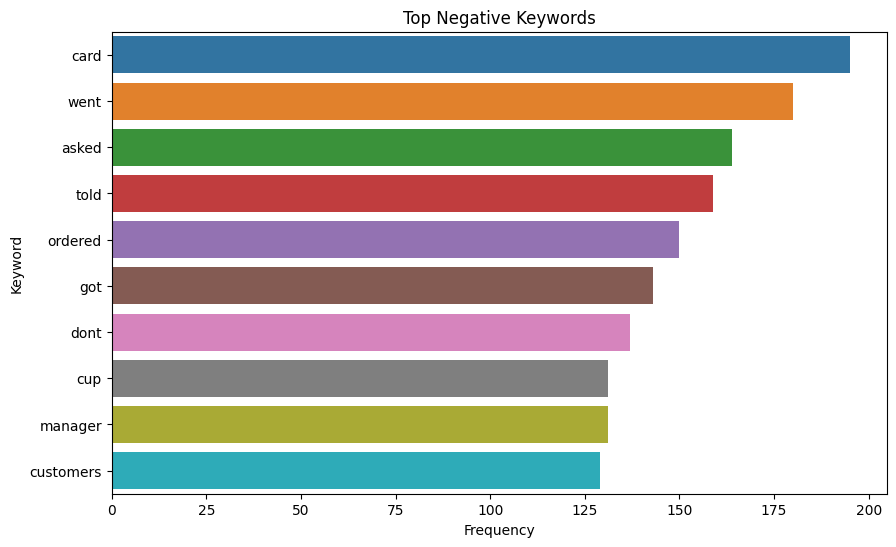

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to count word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the reviews
X = vectorizer.fit_transform(df['Cleaned Review'])

# Sum the word frequencies
word_freq = X.sum(axis=0)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display top keywords
top_keywords_df = pd.DataFrame({'Keyword': feature_names, 'Frequency': word_freq.tolist()[0]})

# Sort by frequency in descending order
top_keywords_df = top_keywords_df.sort_values(by='Frequency', ascending=False)

# Plot top positive keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_keywords_df.head(10))
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top Positive Keywords')
plt.show()

# Plot top negative keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_keywords_df.tail(10))
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top Negative Keywords')
plt.show()


Printout the sample of positive, neutral, and negative review
===============

In [27]:
# Filter reviews by sentiment label
positive_reviews = df[df['Sentiment Label'] == 'Positive']
neutral_reviews = df[df['Sentiment Label'] == 'Neutral']
negative_reviews = df[df['Sentiment Label'] == 'Negative']

# Print one random review from each category
import random

# Positive review
if not positive_reviews.empty:
    positive_sample = positive_reviews.sample(1)
    print("Positive Review:")
    print(positive_sample['Review'].values[0])
else:
    print("No positive reviews available.")

# Neutral review
if not neutral_reviews.empty:
    neutral_sample = neutral_reviews.sample(1)
    print("\nNeutral Review:")
    print(neutral_sample['Review'].values[0])
else:
    print("\nNo neutral reviews available.")

# Negative review
if not negative_reviews.empty:
    negative_sample = negative_reviews.sample(1)
    print("\nNegative Review:")
    print(negative_sample['Review'].values[0])
else:
    print("\nNo negative reviews available.")


Positive Review:
I’m on this kick of drinking 5 cups of warm water. I work for Instacart right now and every location of Starbucks I was given free hot water because I asked for it without being charged. I really appreciate Starbucks for giving me the opportunity to do such thing. That’s why I give them five stars. They fully have my support. They’re super nice and professional and the coffee is great. Go to Starbucks.

Neutral Review:
No Review Text

Negative Review:
Asked staff question. Was very rude and snappy. Same with other customers...acted like they were doing us a favor being there...puts a very poor image of your company. Last time I will go to this location.
